{(1, 123.08): [(0.0032024693000000004, 43500976.0), (0.0083229017, 49691772.0), (0.012295602999999999, 45706232.0), (0.016459285, 44869244.0), (0.020845083, 42820124.0), (0.025536767000000002, 43065416.0), (0.029650969000000003, 44026912.0), (0.034078383, 43142672.0), (0.038730136, 41159132.0), (0.043326333, 38827536.0), (0.047774302, 41593516.0), (0.052432568, 52566740.0), (0.055707585, 217158510.0), (0.058952083999999995, 196519600.0), (0.062261402, 128483480.0), (0.065799267, 116460450.0)], (17, 98.51): [(0.06893751899999999, 37984952.0)], (18, 141.96): [(0.07232501799999999, 36487748.0), (0.07581974999999999, 27881214.0), (0.079402486, 20191866.0), (0.083001366, 16065258.0), (0.086646266, 13118672.0)], (23, 90.53): [(0.091468782, 11189472.0), (0.095297201, 12151477.0), (0.09923791800000001, 11557641.0), (0.10323638, 11670123.0), (0.10723543, 11948309.0), (0.11125513999999999, 11851904.0), (0.11532482000000001, 11704980.0), (0.11948051999999999, 11157813.0), (0.12355837, 11590084.0)

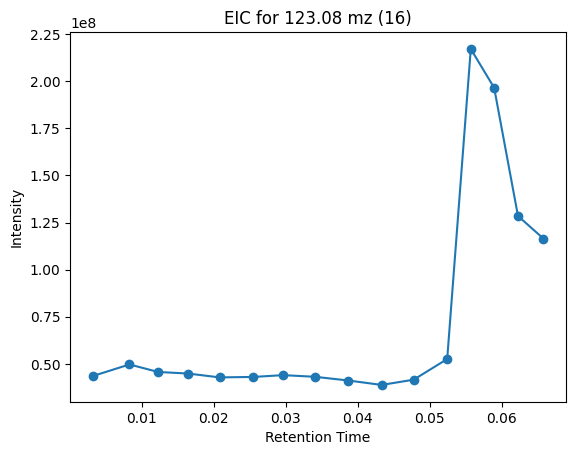

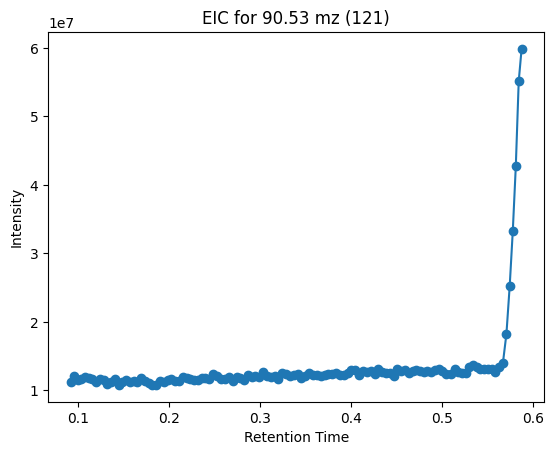

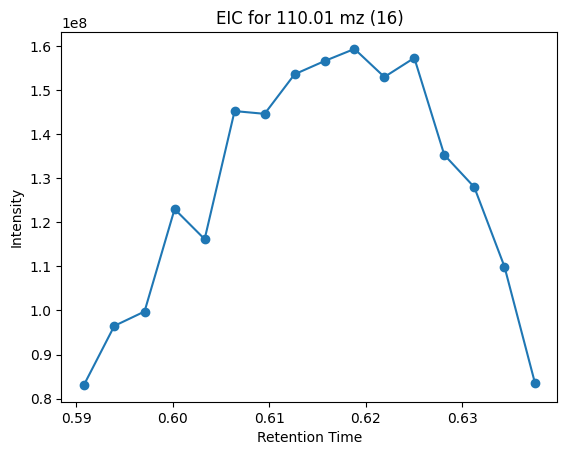

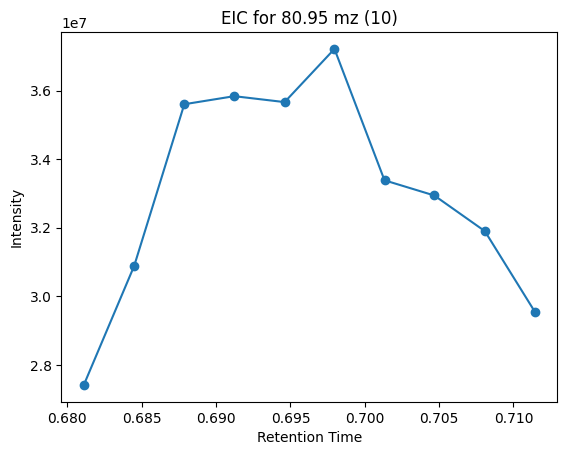

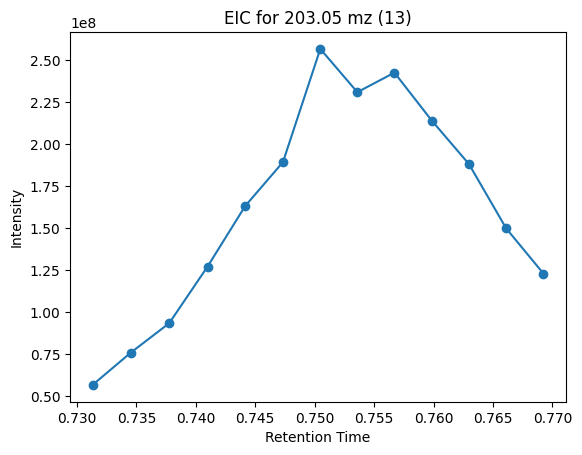

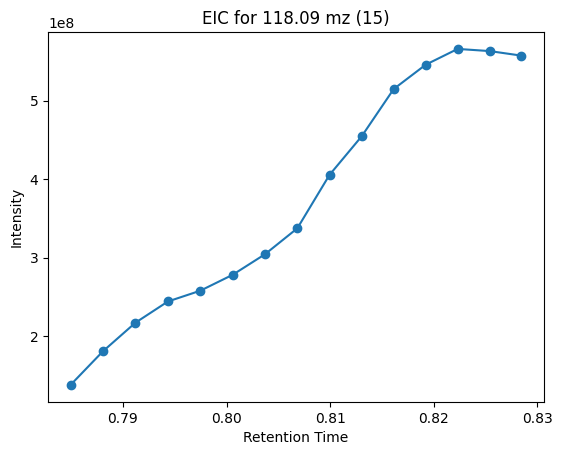

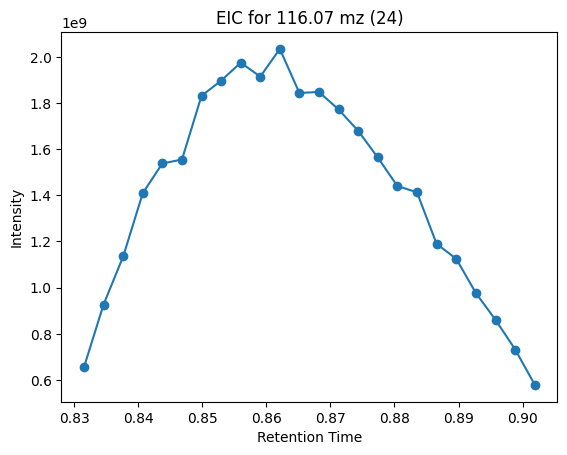

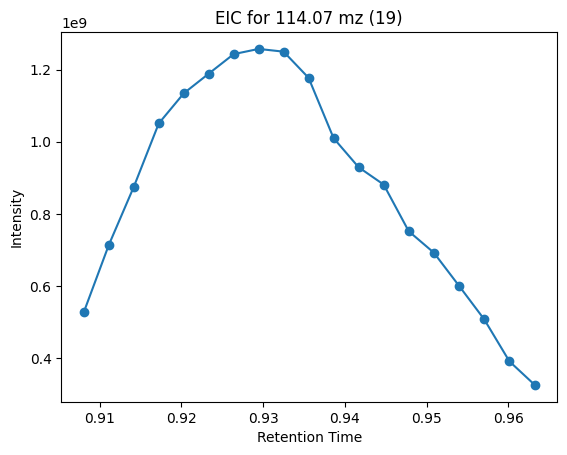

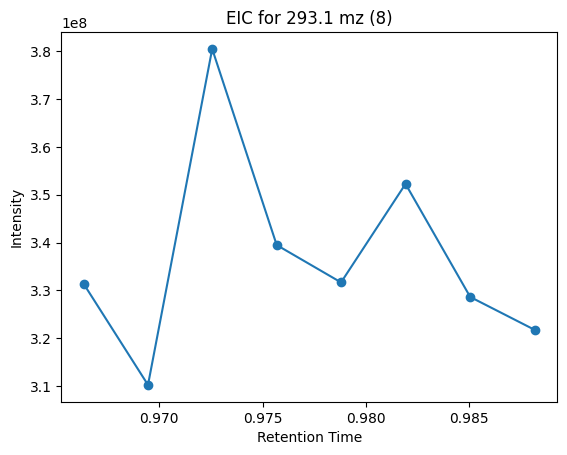

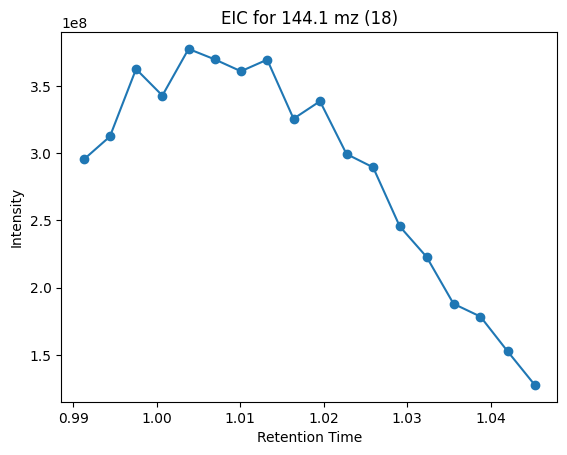

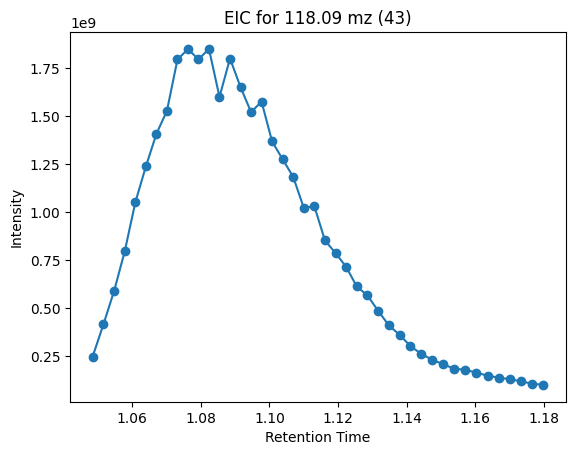

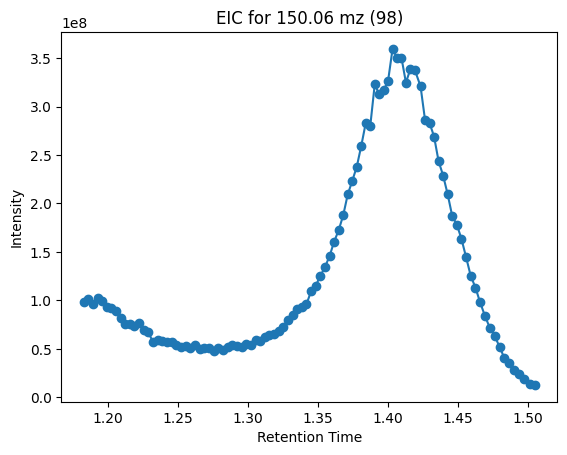

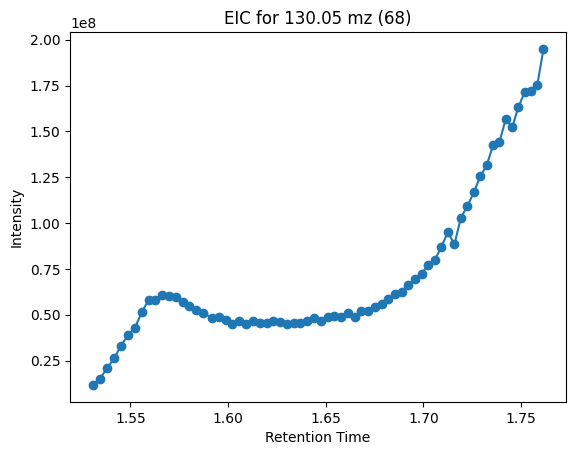

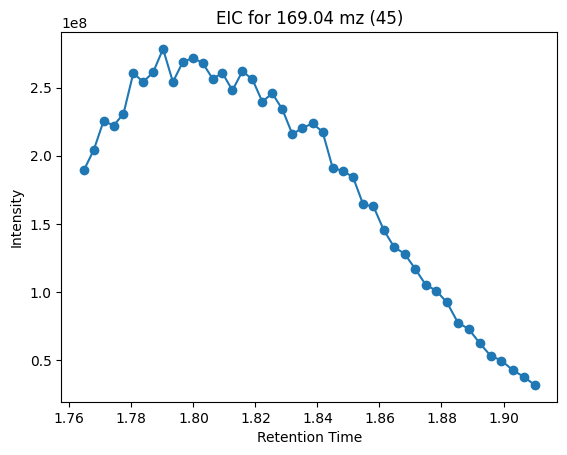

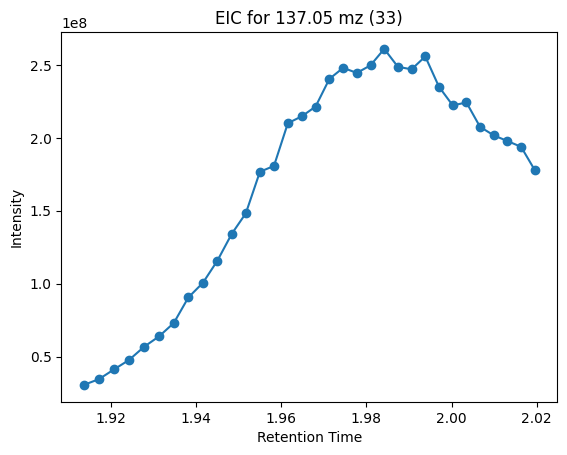

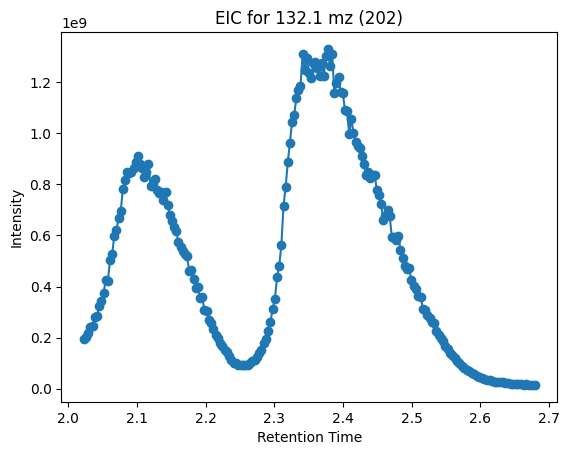

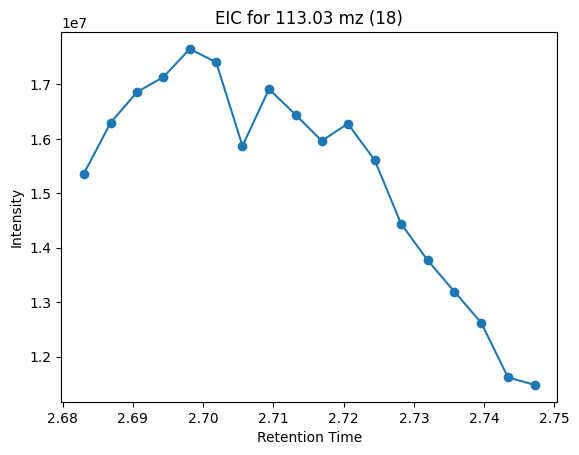

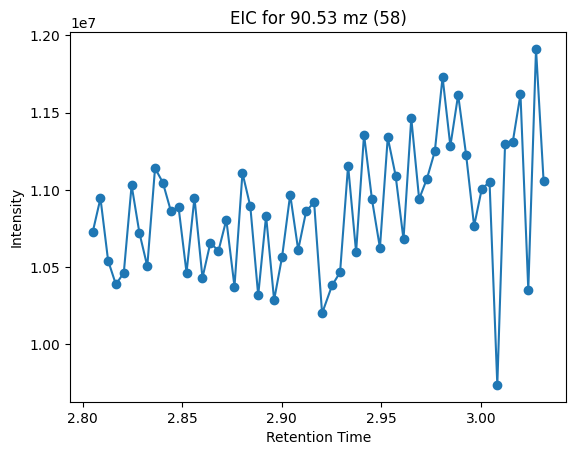

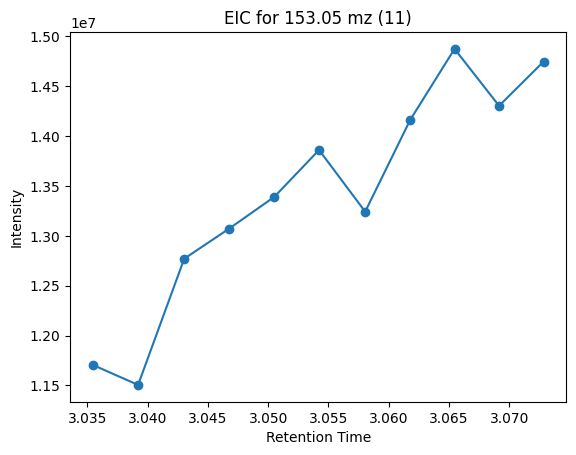

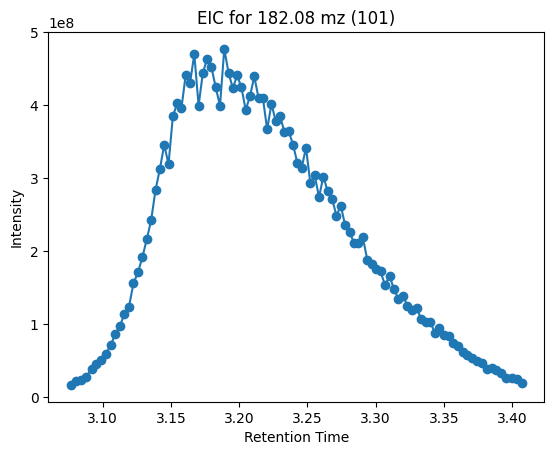

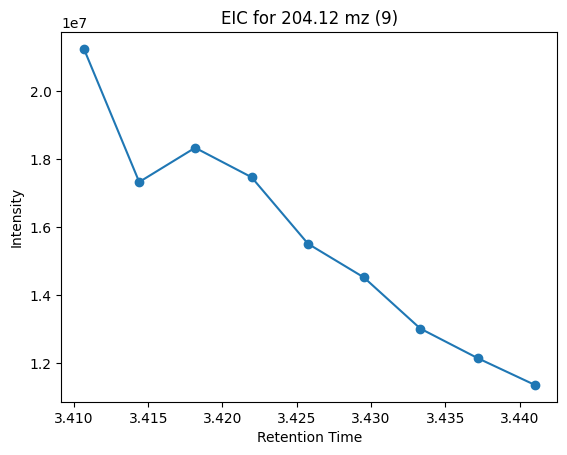

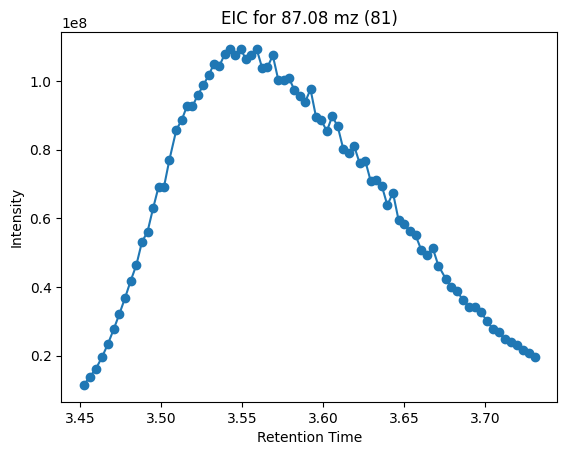

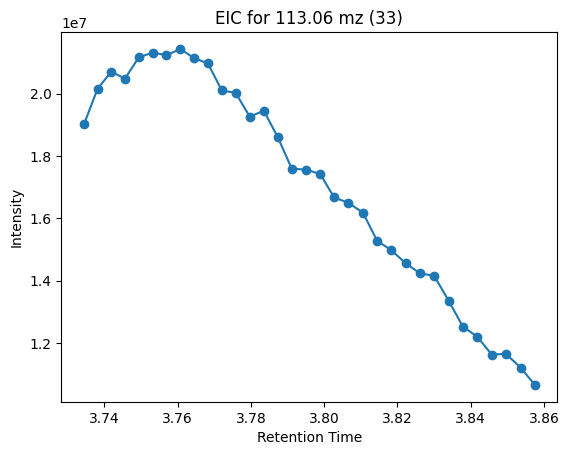

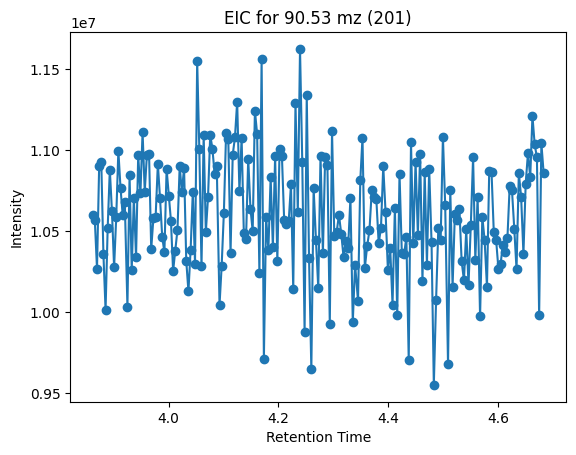

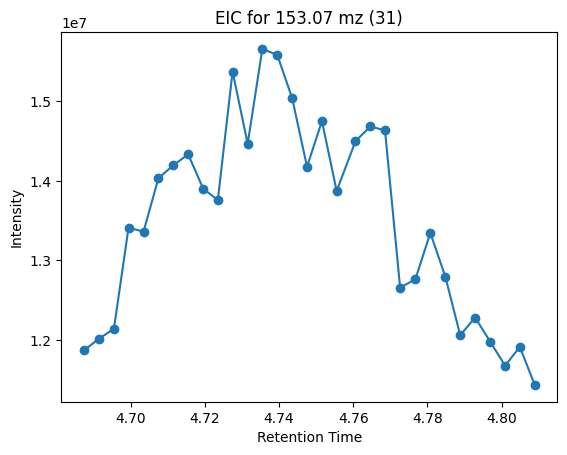

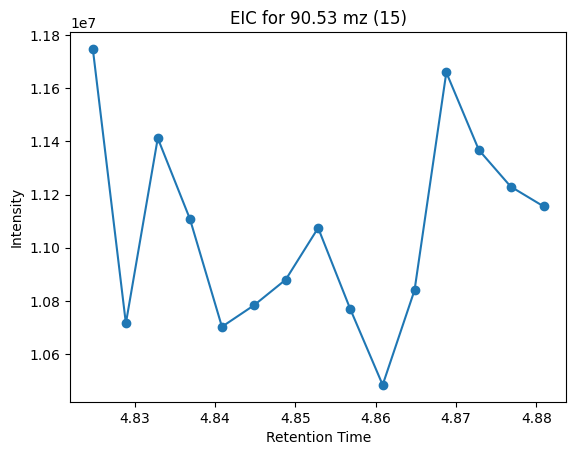

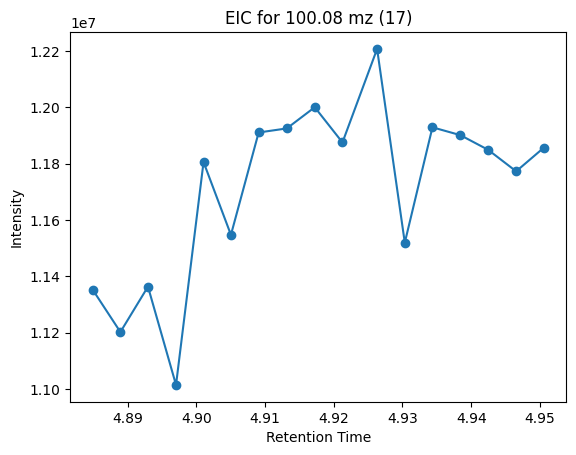

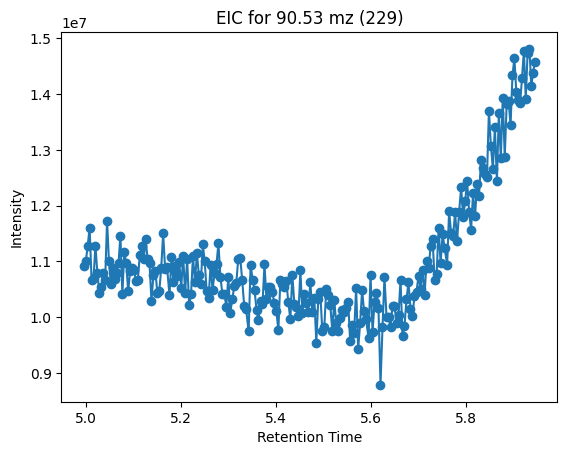

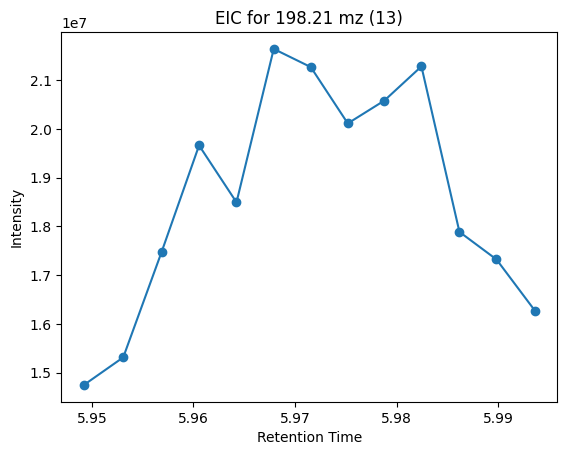

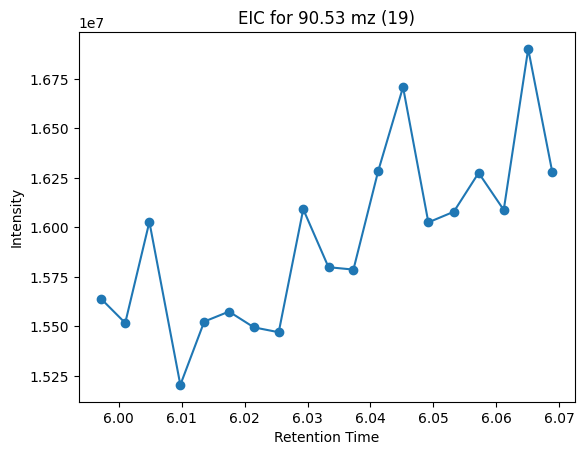

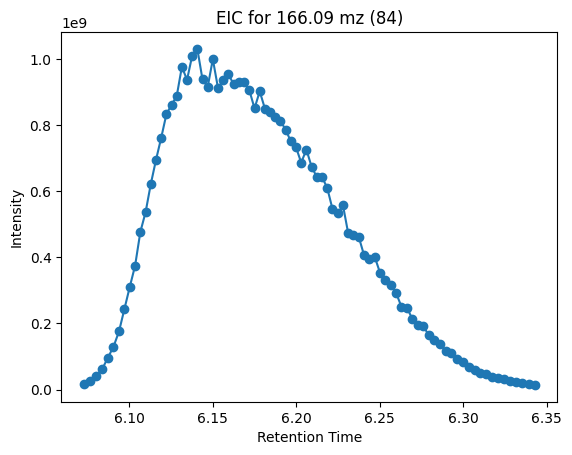

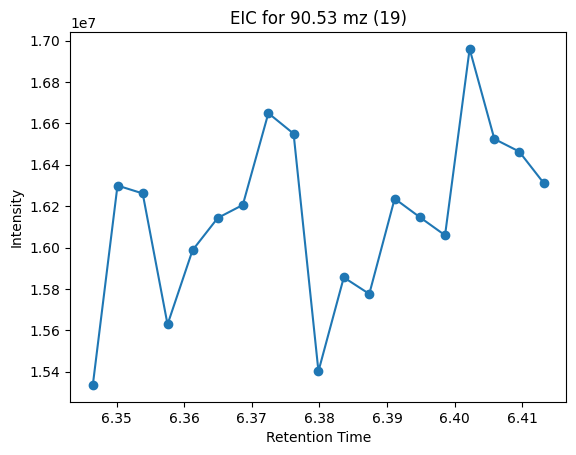

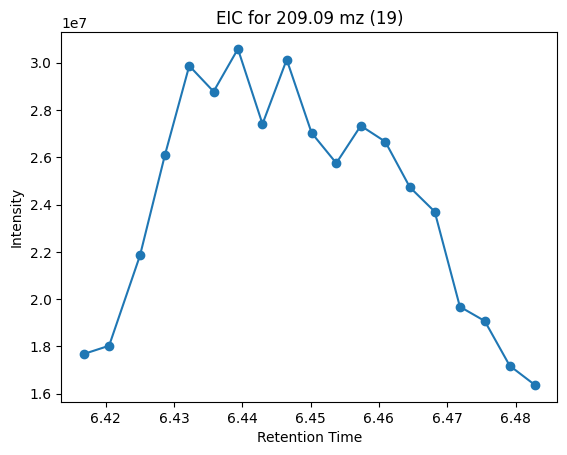

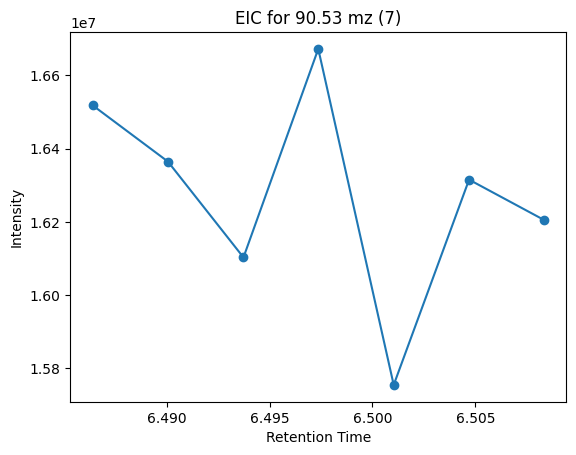

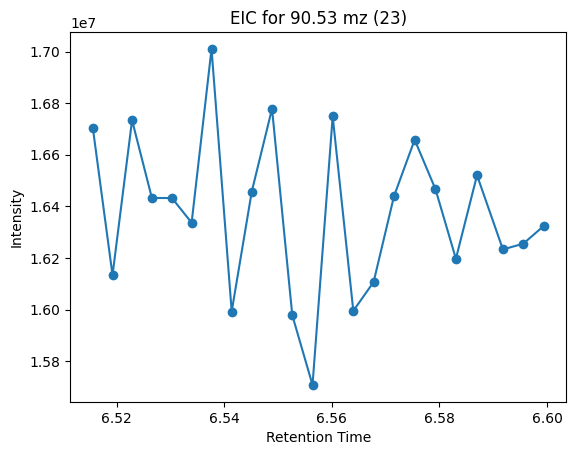

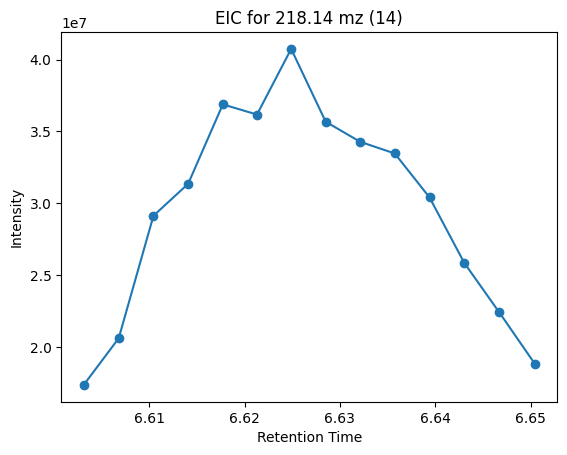

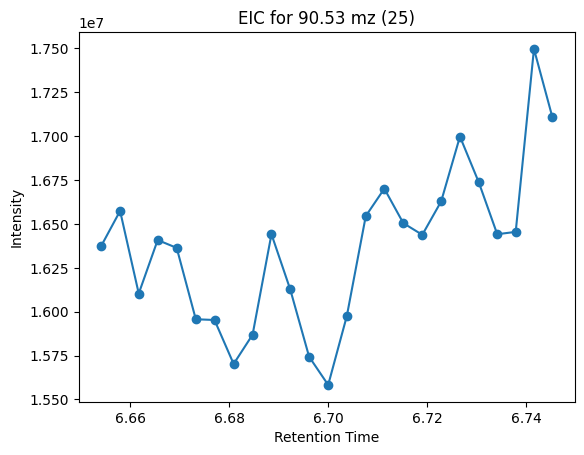

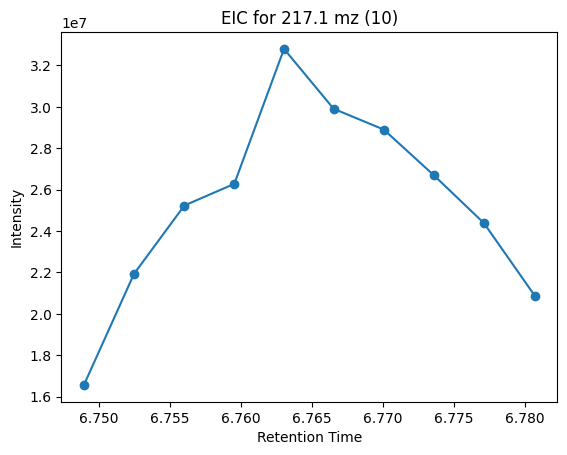

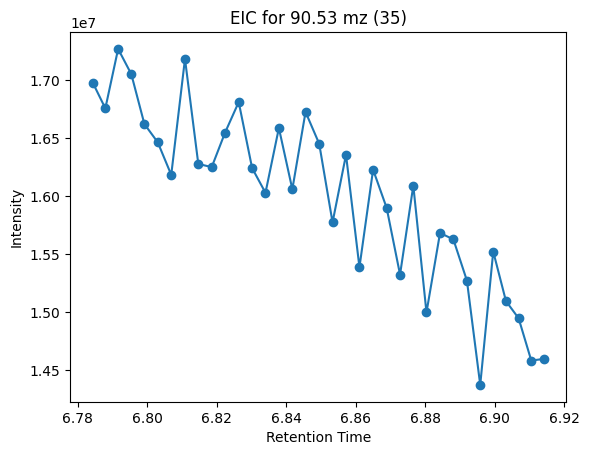

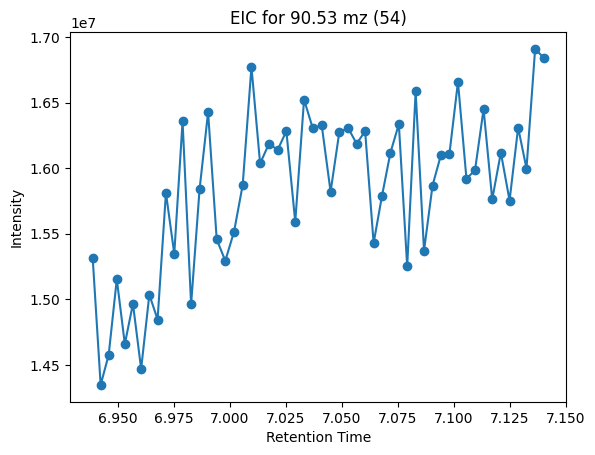

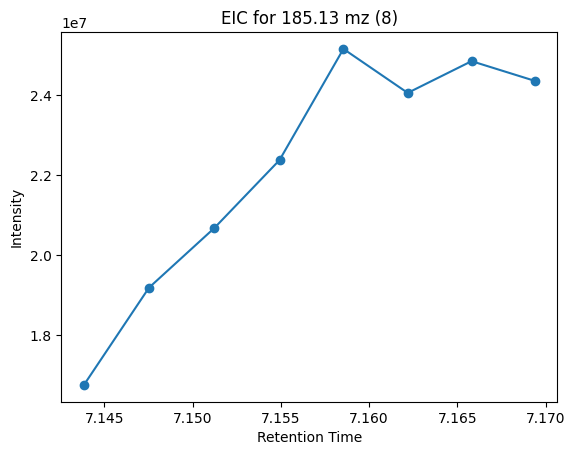

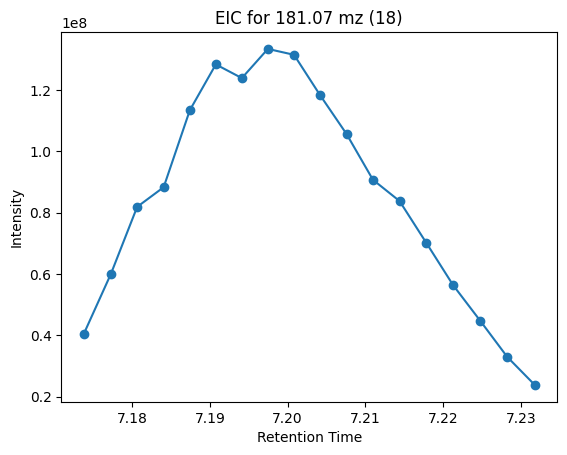

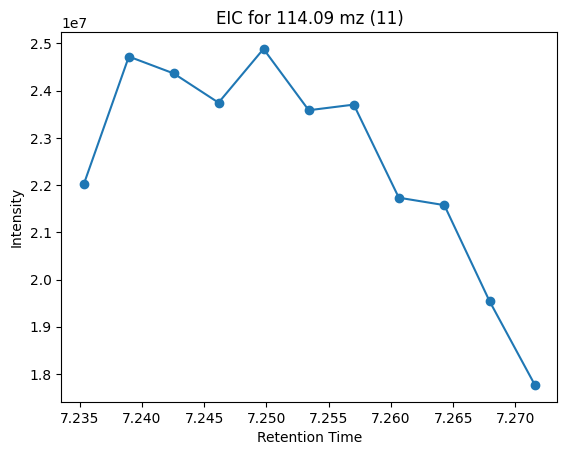

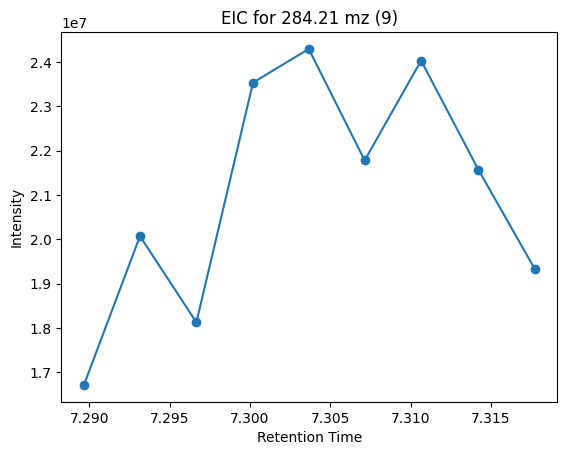

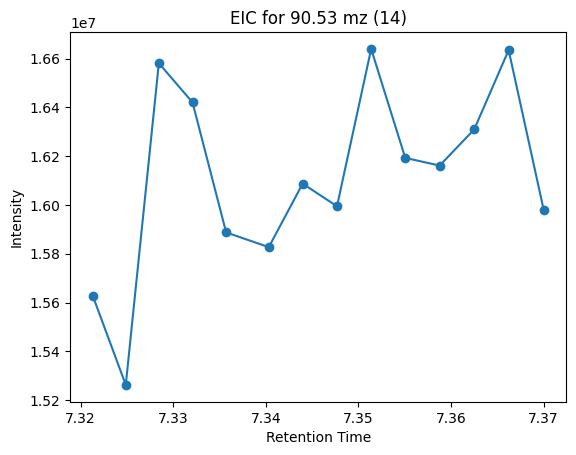

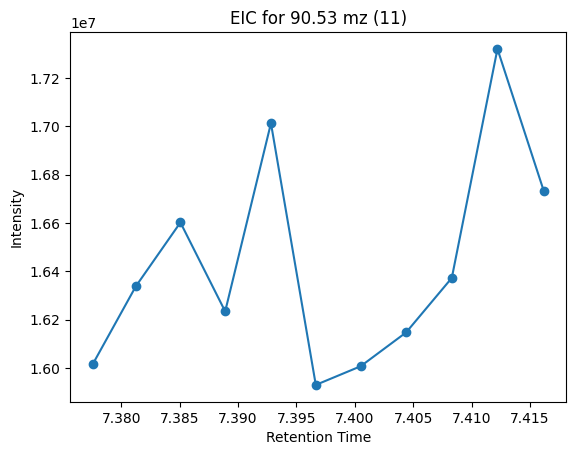

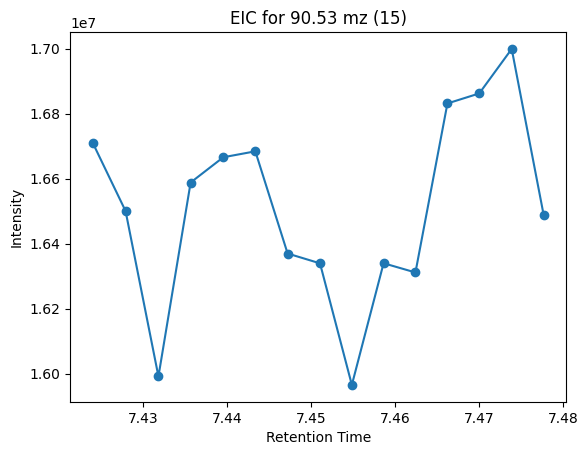

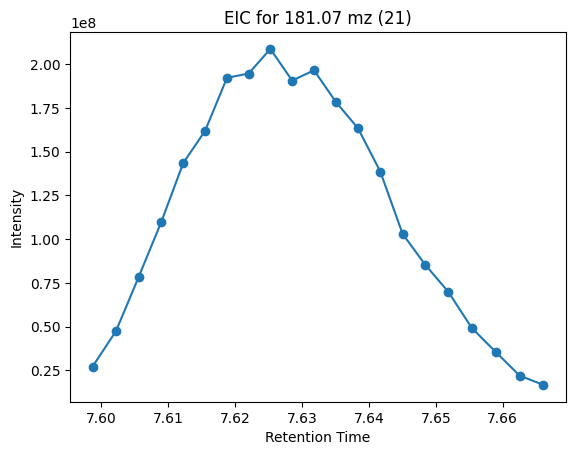

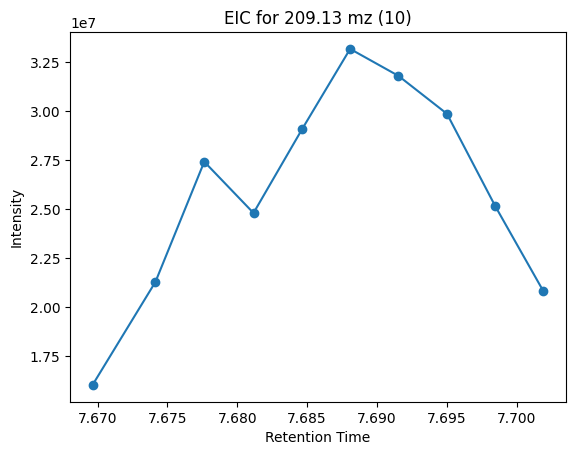

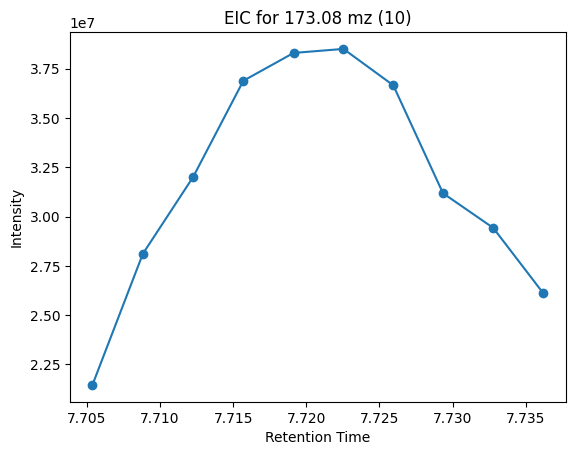

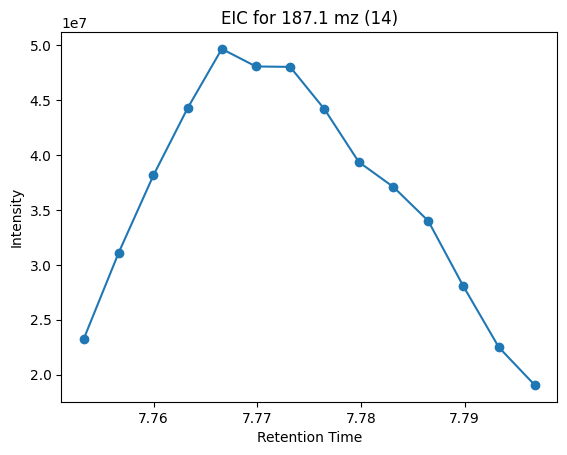

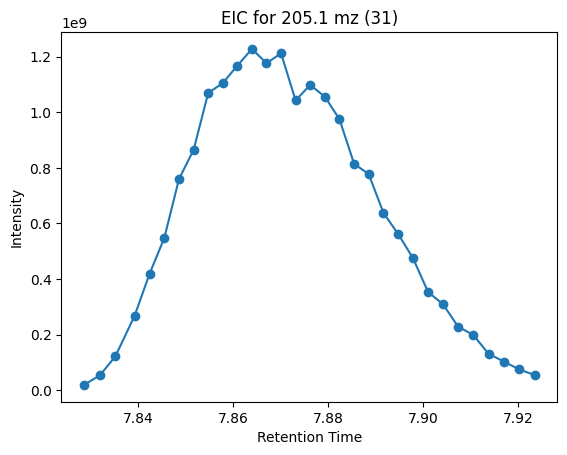

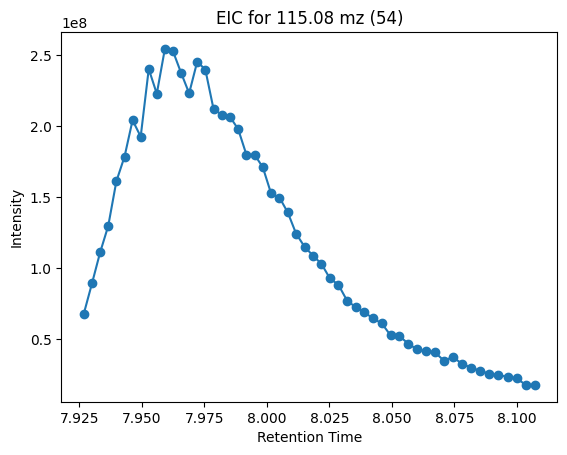

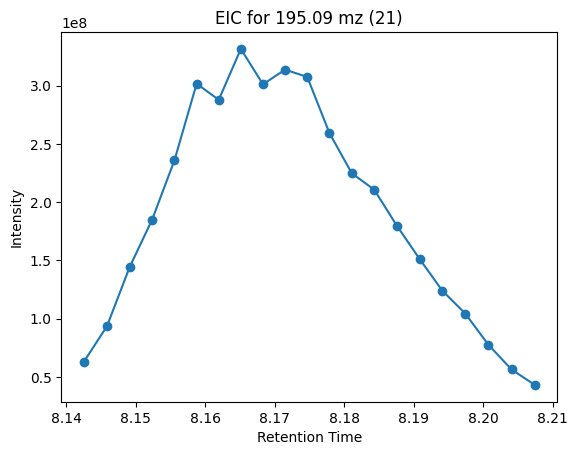

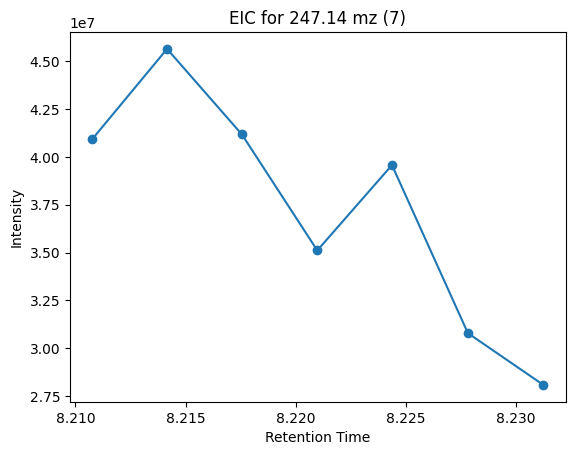

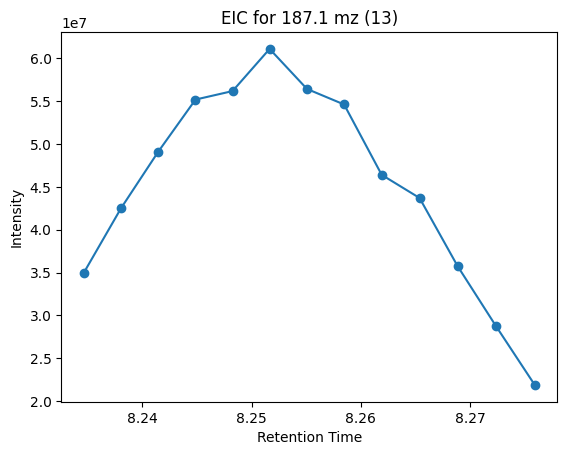

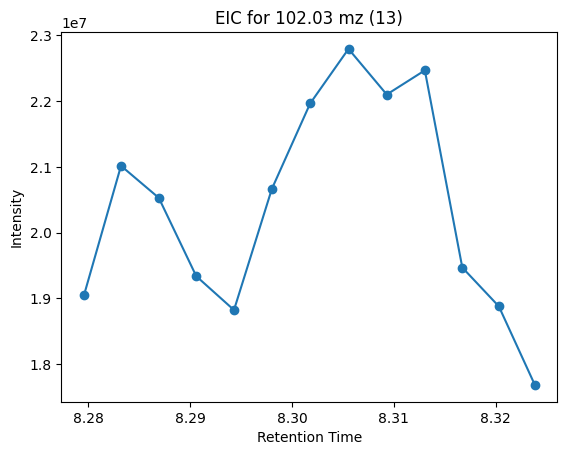

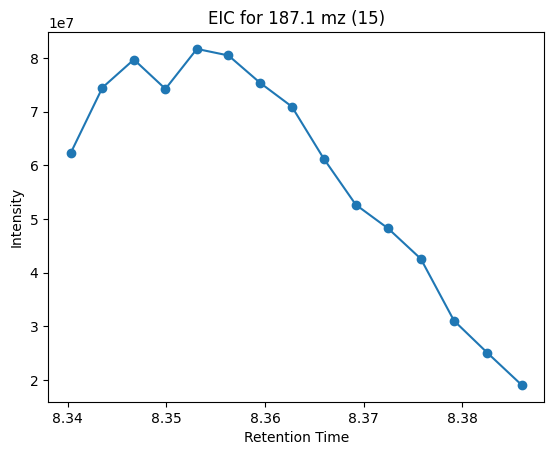

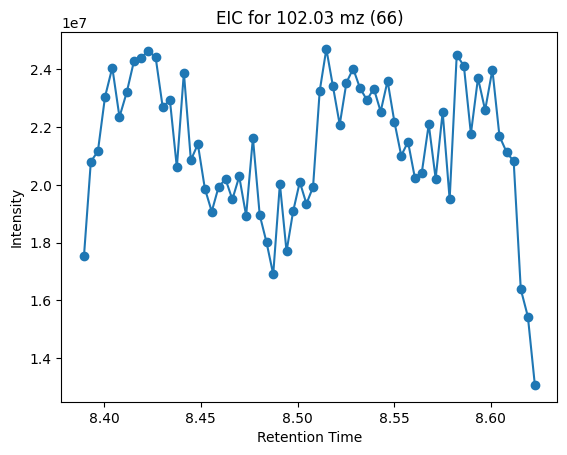

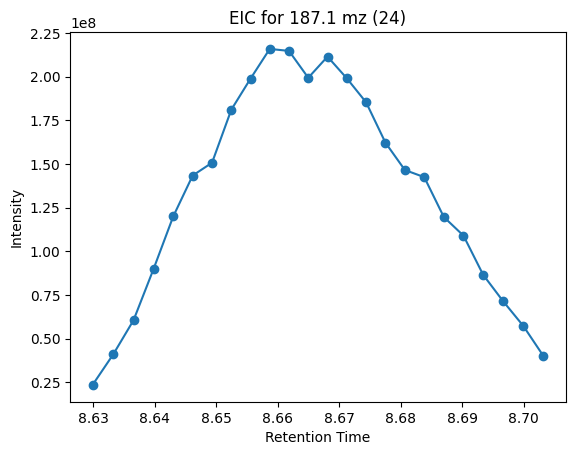

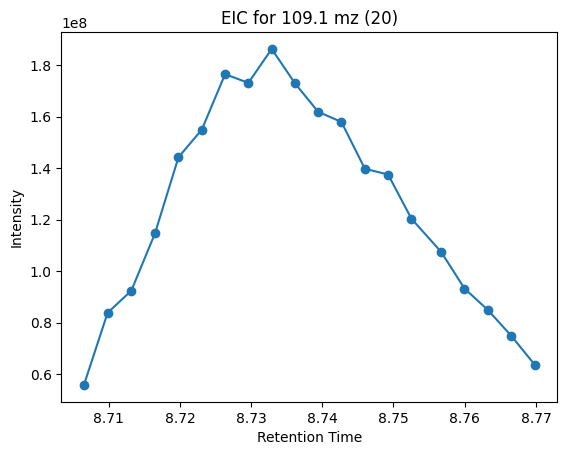

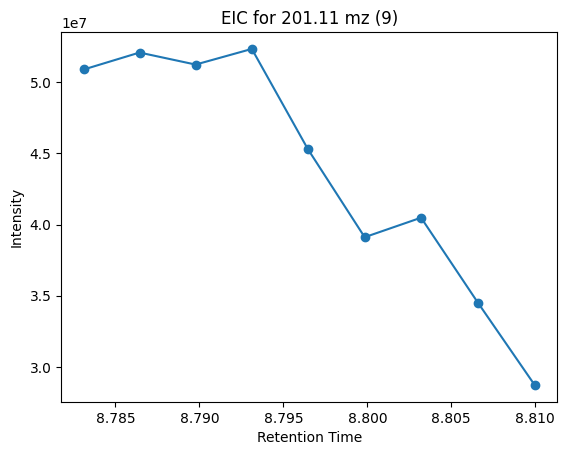

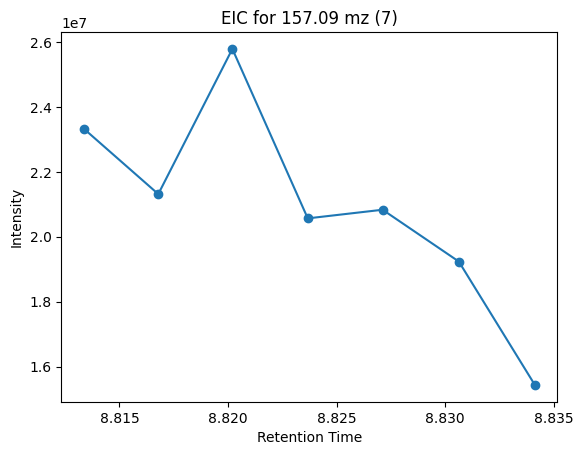

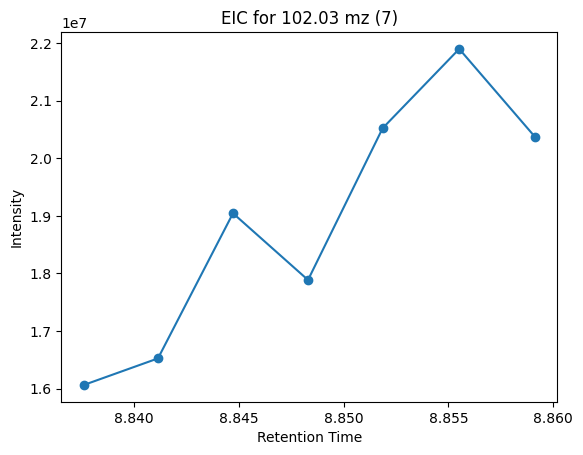

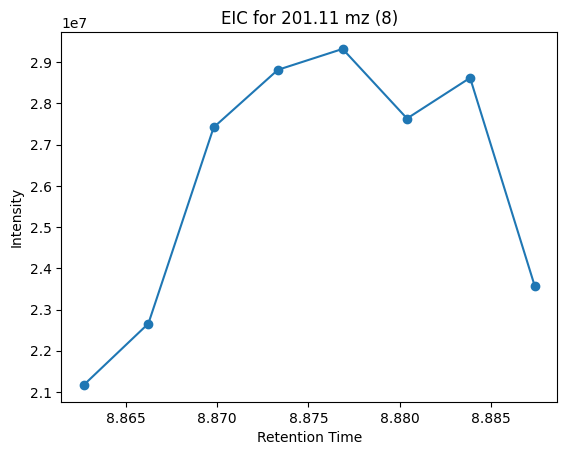

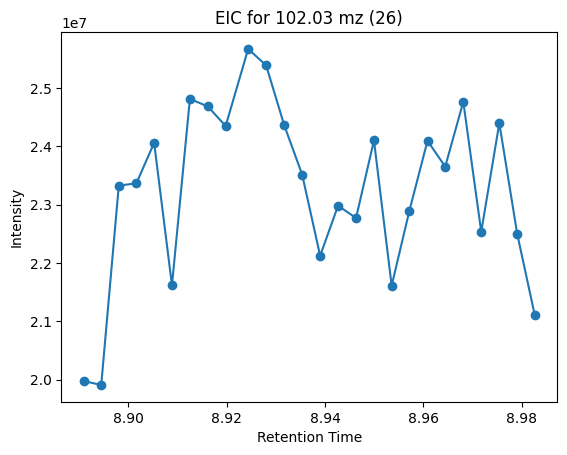

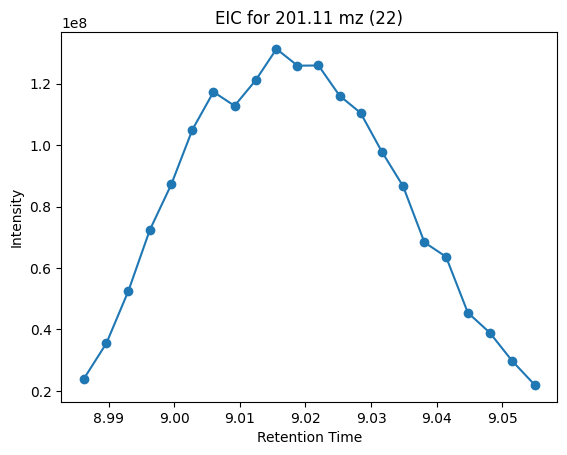

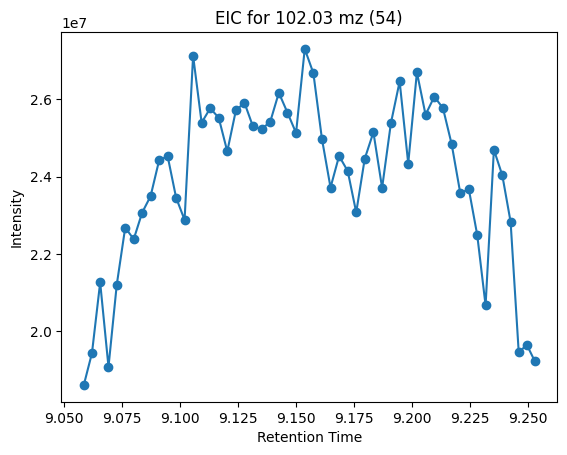

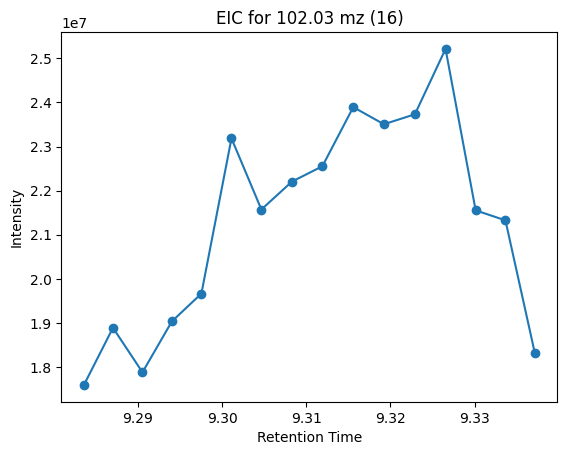

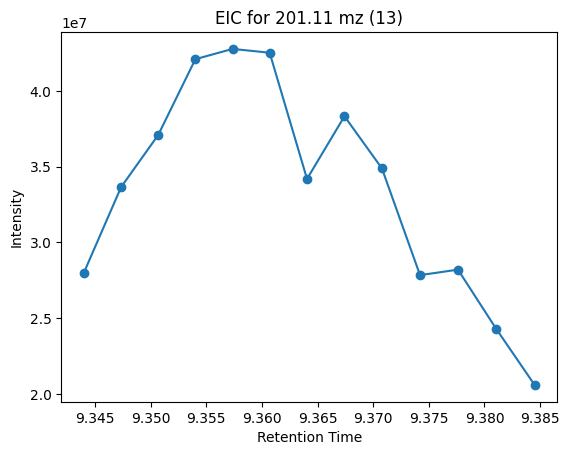

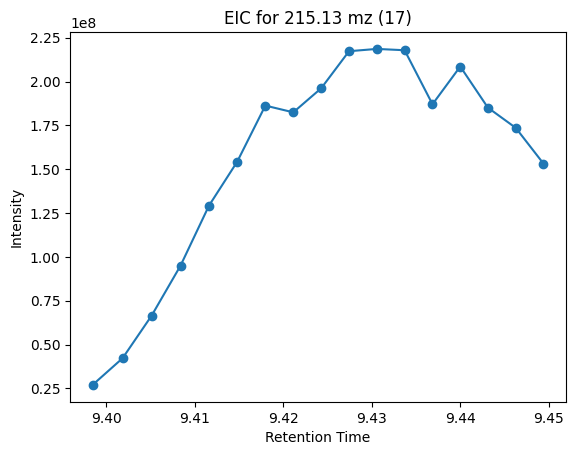

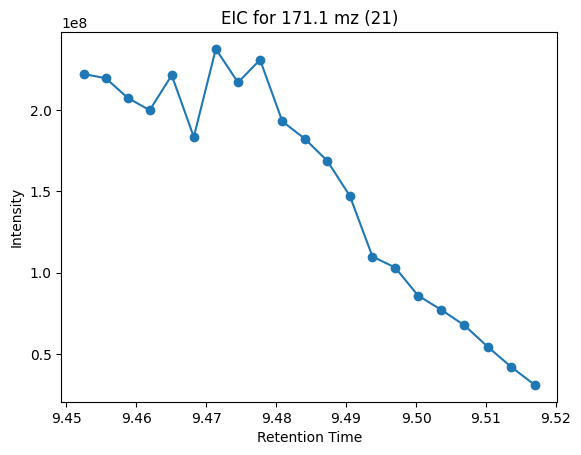

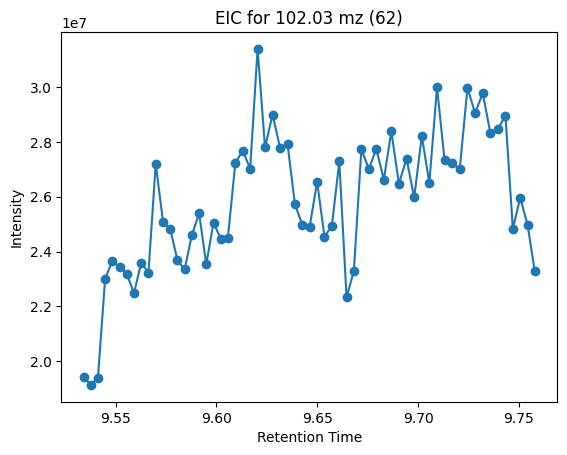

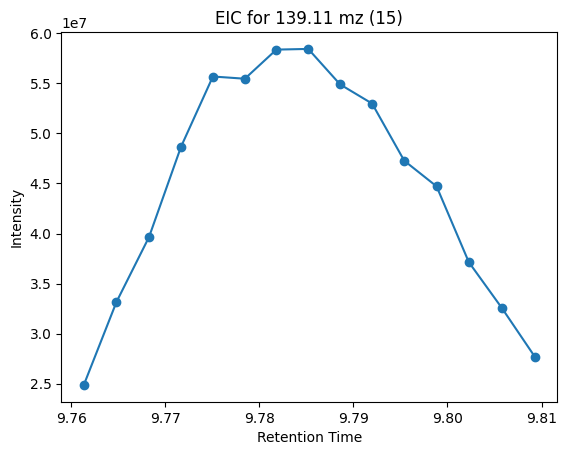

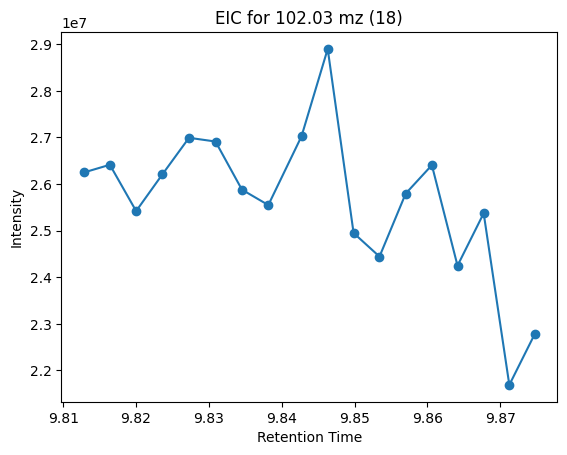

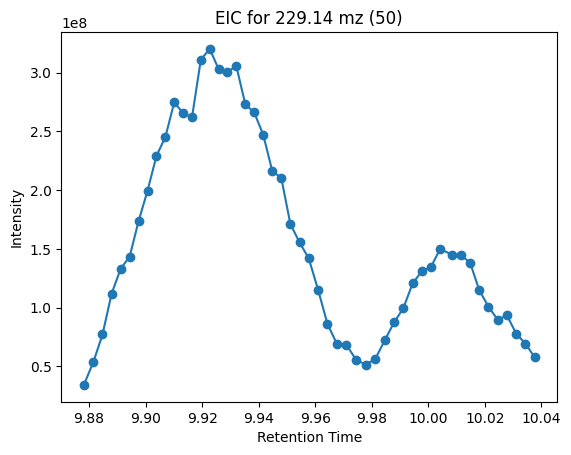

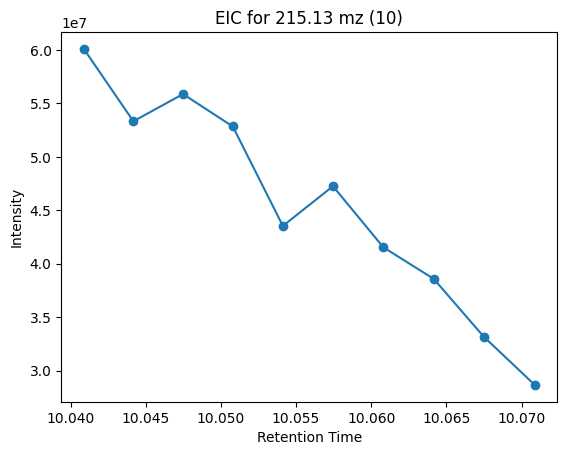

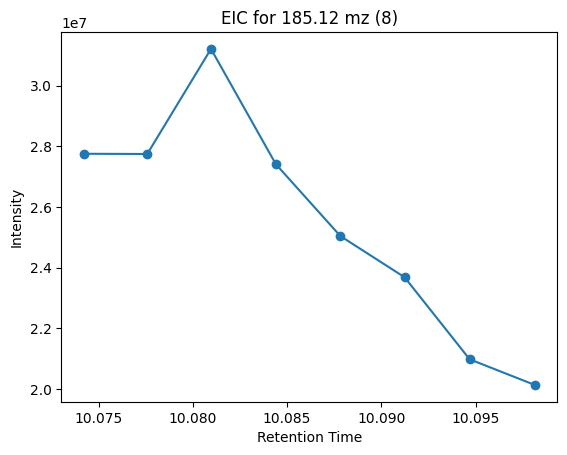

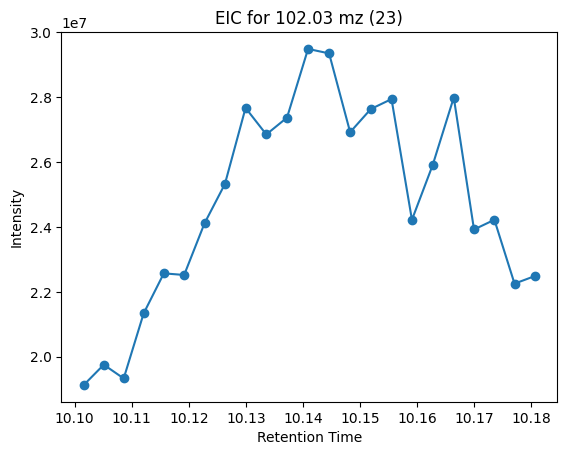

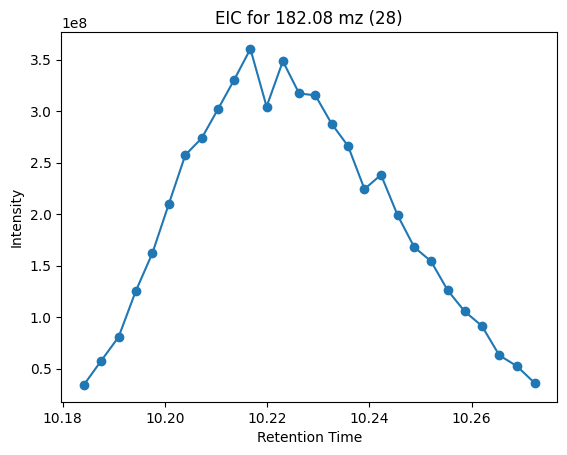

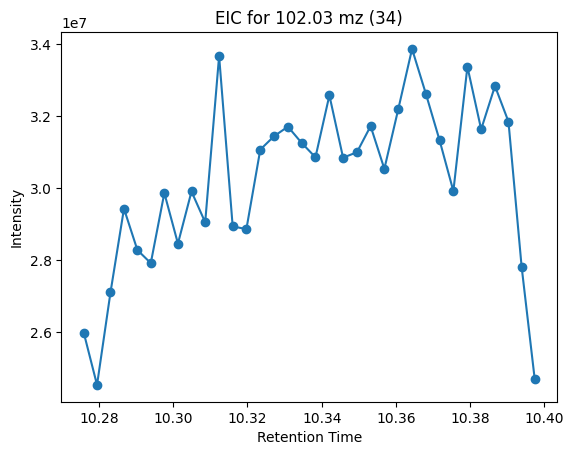

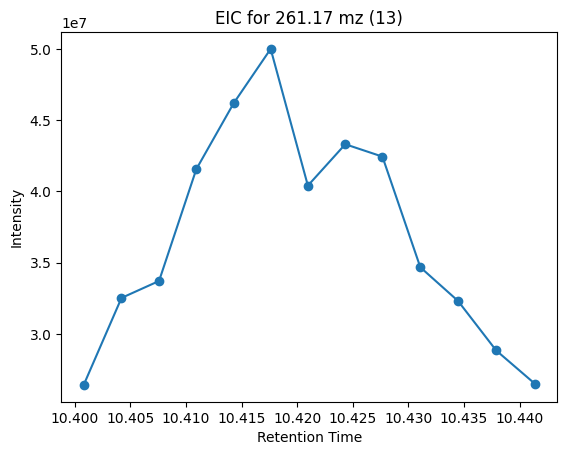

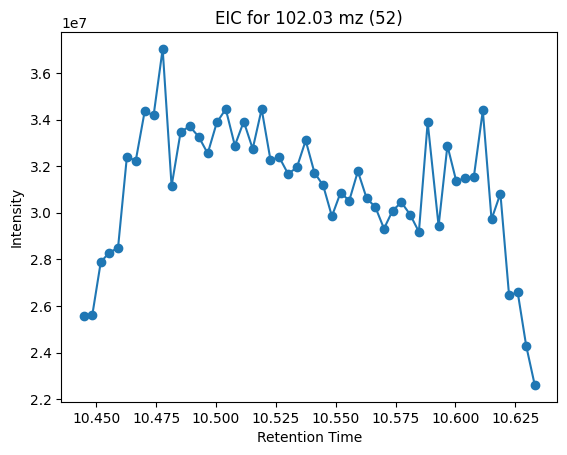

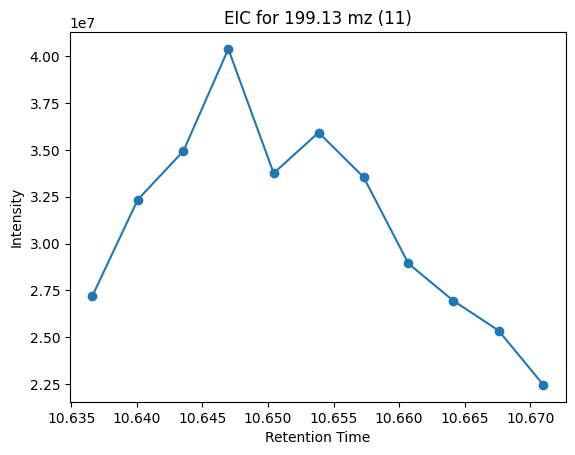

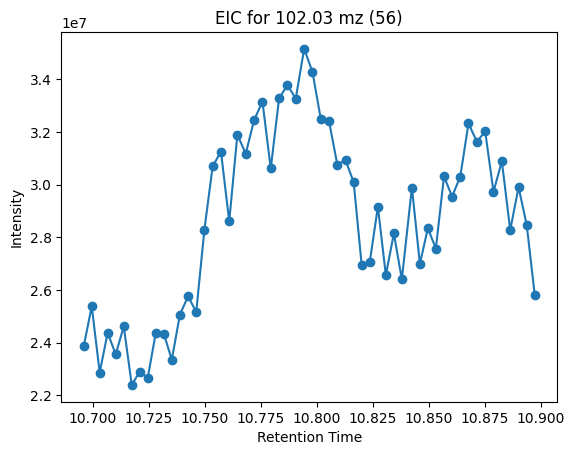

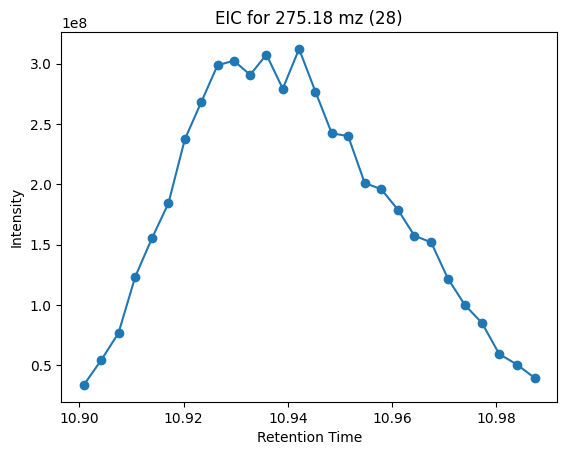

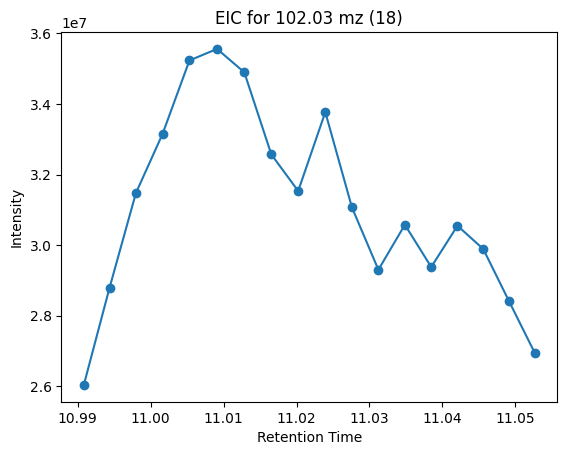

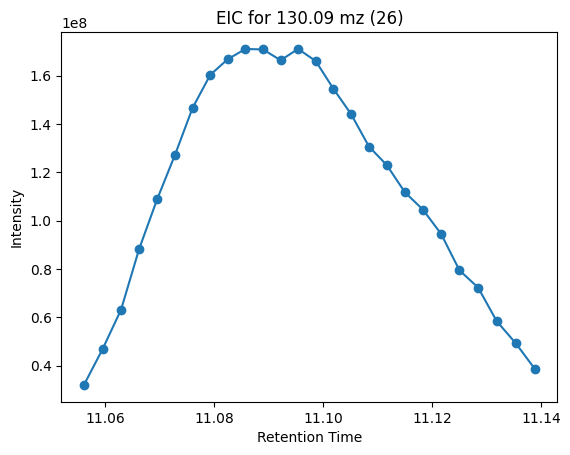

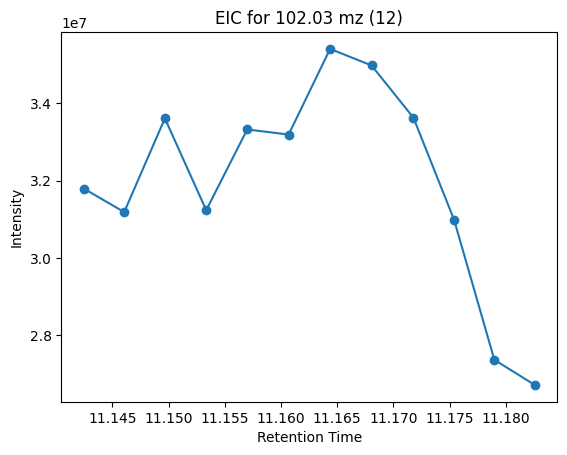

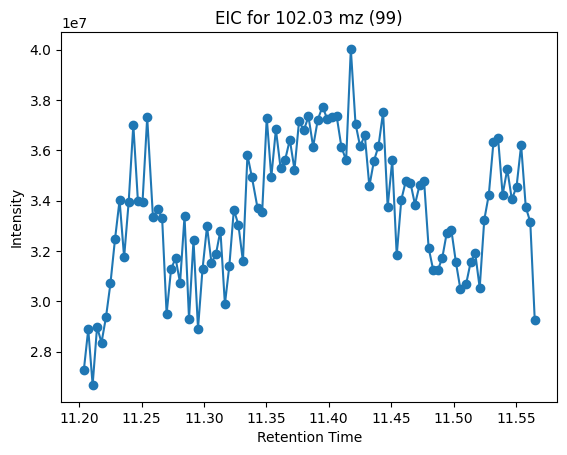

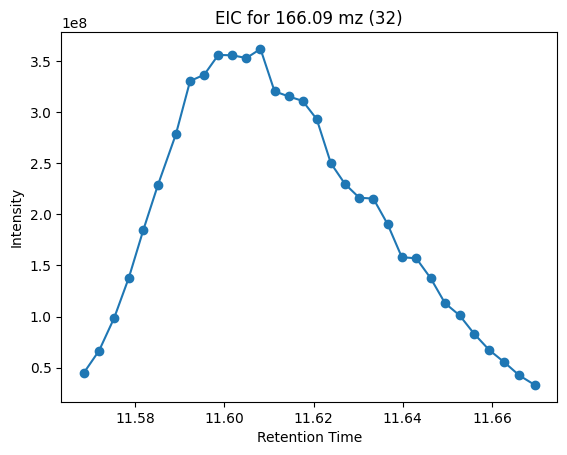

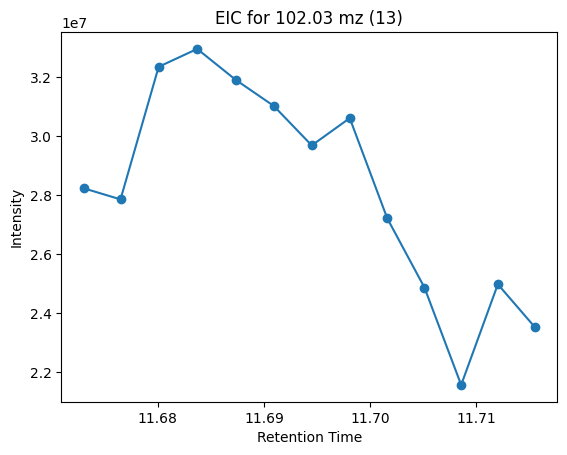

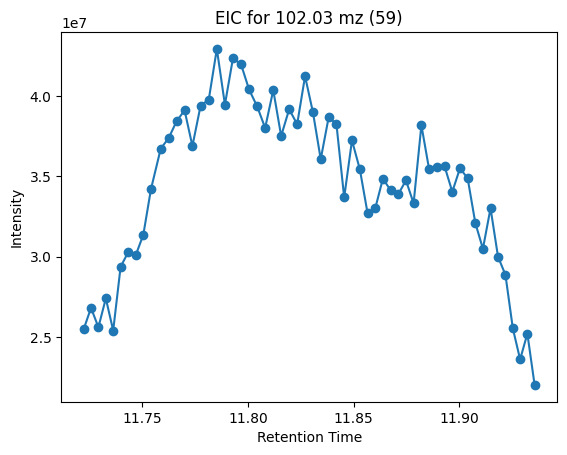

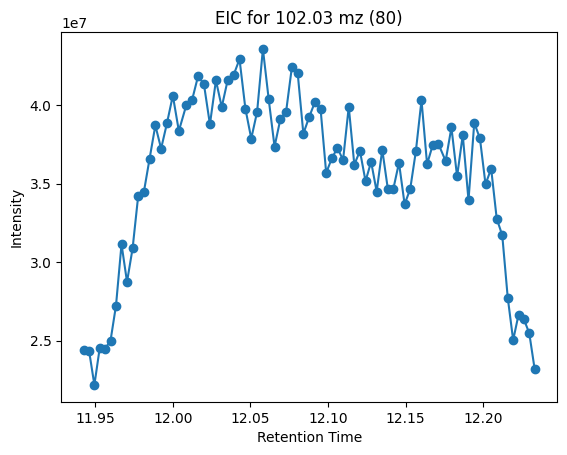

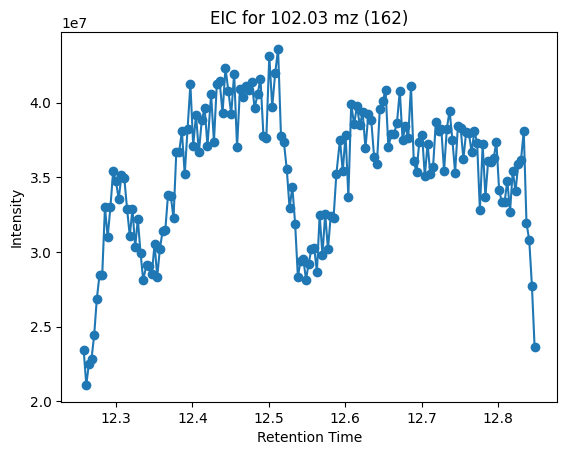

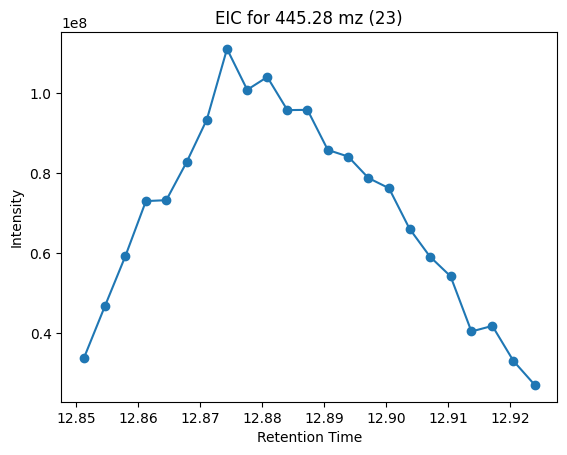

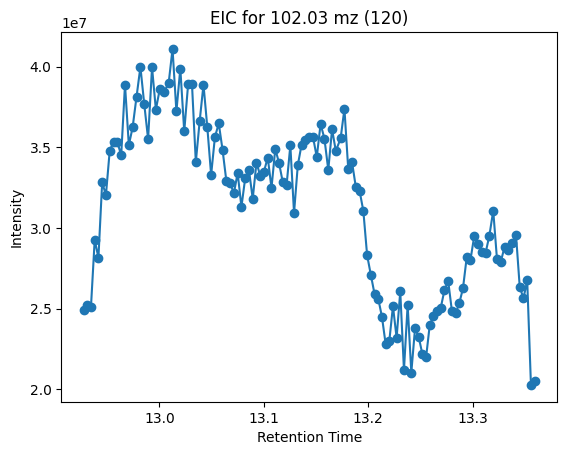

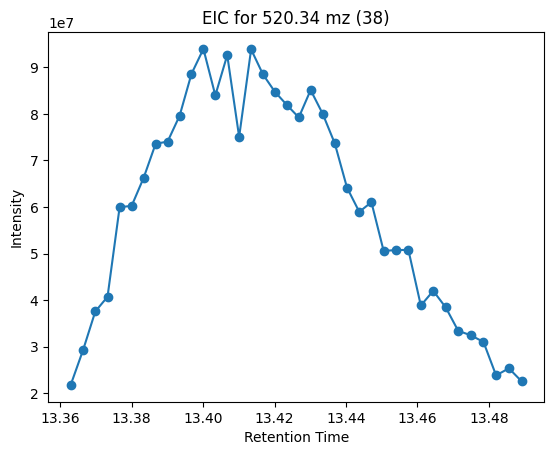

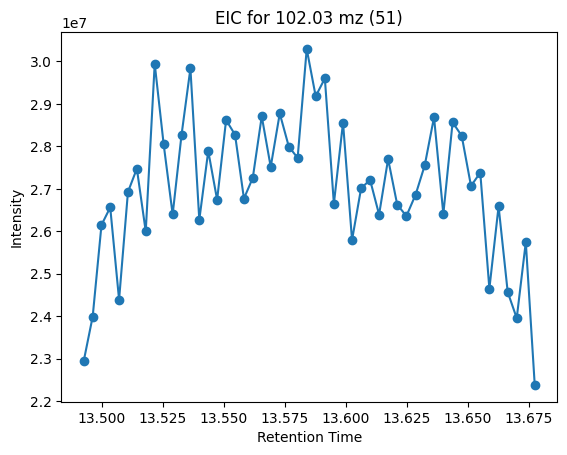

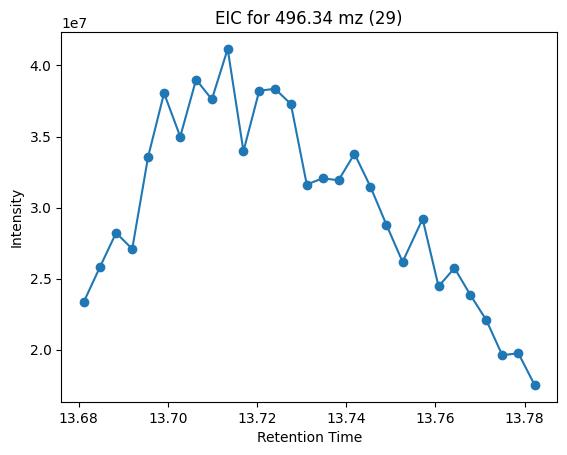

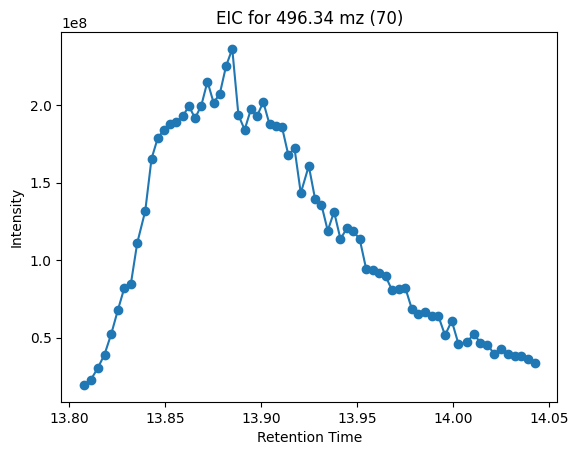

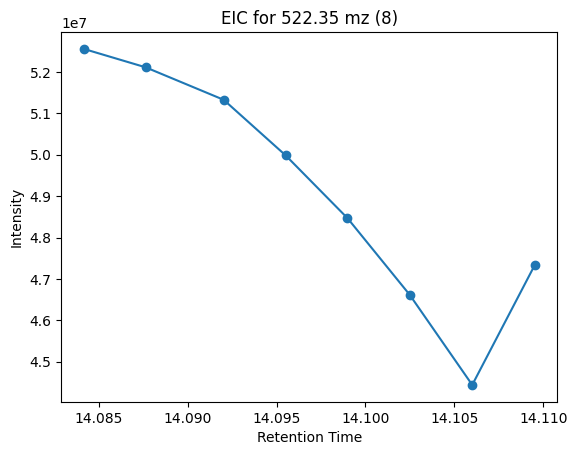

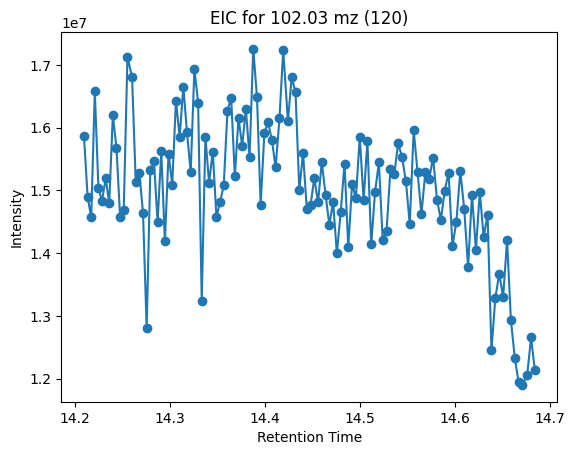

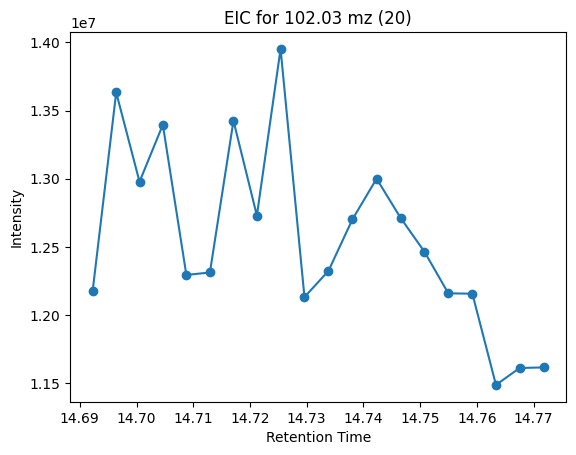

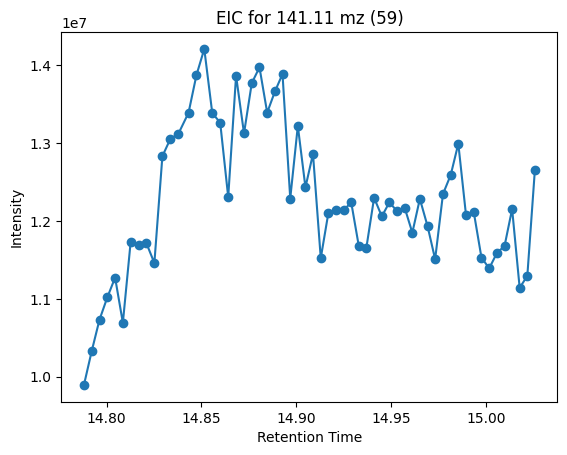

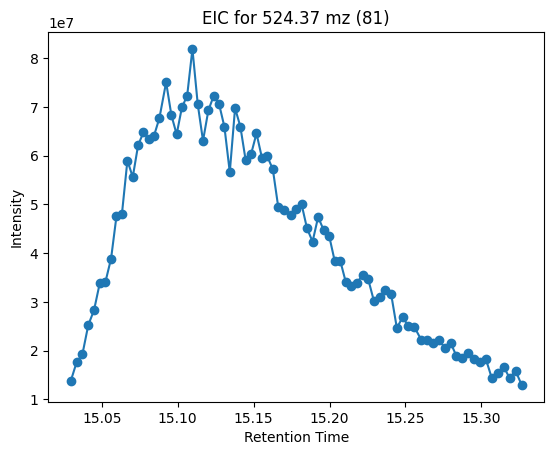

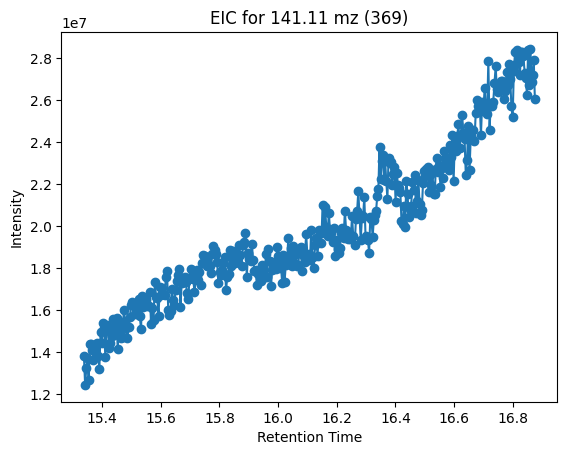

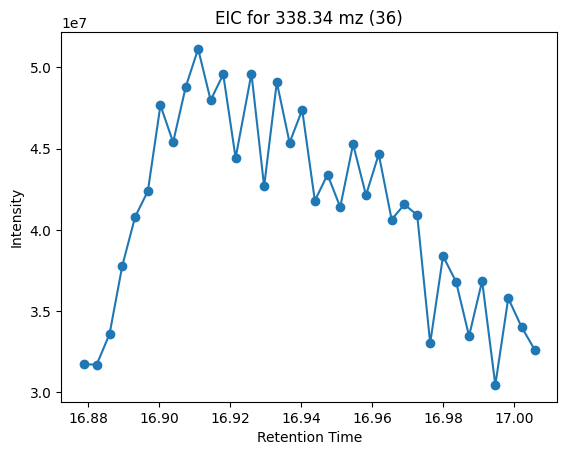

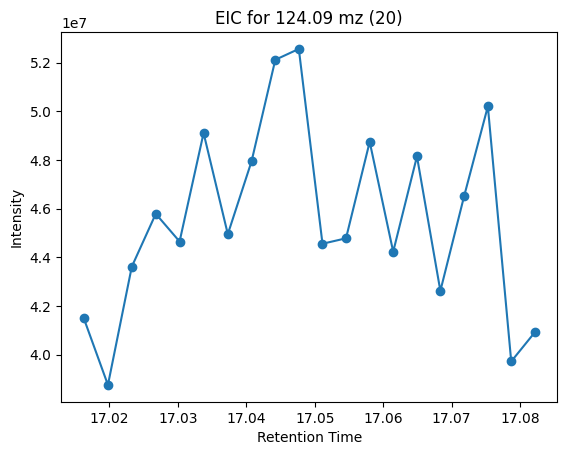

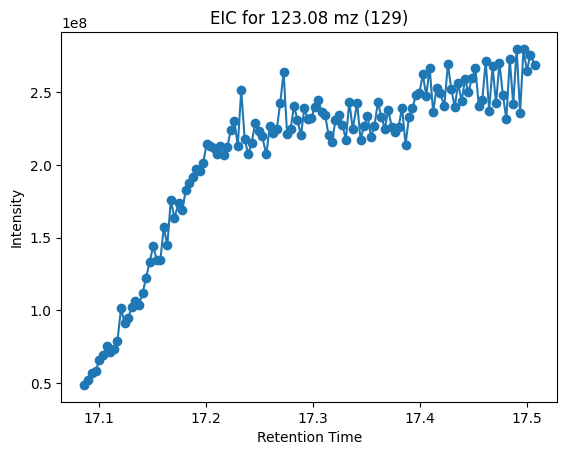

In [9]:
try:
    import lxml
except ImportError:
    !pip install lxml
import matplotlib.pyplot as plt
from pyteomics import mzxml
import heapq

mzxml_file_path = 'ex.mzXML'

file = mzxml.read(mzxml_file_path)


graphData = {}

mzValues = {round(scan['basePeakMz'], 2) for scan in file}

top50_mz = heapq.nlargest(200, mzValues)

file = mzxml.read(mzxml_file_path)

mz = "basePeakMz"
prevnum = -1
prevMZ = (-1, -1)
for scan in file:
    currMZ = round(scan['basePeakMz'], 2)
    currNum = int(scan['num'])
    if currMZ in top50_mz:
        value = (float(scan['retentionTime']), float(scan['basePeakIntensity']))
        if currNum - 1 == prevnum and prevMZ[1] == currMZ:
            graphData[prevMZ].append(value)

        else:
            prevMZ = (int(scan['num']), currMZ)
            graphData[prevMZ] = [value]
        prevnum = currNum

print(graphData)

for graph in graphData:
    length = len(graphData[graph])
    if length > 6:
        x, y = zip(*graphData[graph])
        plt.plot(x, y, marker='o', linestyle='-')
        plt.xlabel('Retention Time')
        plt.ylabel('Intensity')
        plt.title(f"EIC for {graph[1]} mz ({length})")
        plt.show()
